## More stock manipulations
https://pythonprogramming.net/more-stock-data-manipulation-python-programming-for-finance/

Hello and welcome to part 4 of the Python for Finance tutorial series. In this tutorial, we're going to create a candlestick / OHLC graph based on the Adj Close column, which will allow me to cover resampling and a few more data visualization concepts.

An OHLC chart, called a candlestick chart, is a chart that condenses the open, high, low, and close data all in one nice format. Plus it makes pretty colors, and remember what I told you about good looking charts?

Starting code that's been covered up to this point in previous tutorials:

In [1]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
style.use('ggplot')

df = pd.read_csv('tsla.csv', parse_dates=True, index_col=0)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-03,1.789333,1.800000,1.726667,1.774667,1.774667,19245000
2011-01-04,1.777333,1.796667,1.734667,1.778000,1.778000,17811000
2011-01-05,1.765333,1.793333,1.746000,1.788667,1.788667,21700500
2011-01-06,1.788667,1.866667,1.787333,1.858667,1.858667,30918000
2011-01-07,1.866667,1.905333,1.860000,1.882667,1.882667,33718500
...,...,...,...,...,...,...
2015-12-24,15.370667,15.458667,15.218667,15.371333,15.371333,10620000
2015-12-28,15.432667,15.465333,15.036000,15.263333,15.263333,28519500
2015-12-29,15.337333,15.848000,15.303333,15.812667,15.812667,36094500


Unfortunately, making candlestick graphs right from Pandas isn't built in, even though creating OHLC data is. One day, I am sure this graph type will be made available, but, today, it isn't. That's alright though, we'll make it happen! First, we need to make two new imports:

In [2]:
# from matplotlib.finance import candlestick_ohlc
import mplfinance as mpf
import matplotlib.dates as mdates

The first import is the OHLC graph type from matplotlib, and the second import is the special mdates type that...is mostly just a pain in the butt, but that's the date type for matplotlib graphs. Pandas automatically handles that for you, but, like I said, we don't have that luxury yet with candlesticks.

***Note: The package `matplotlib.finance` is deprecated, I'll use `mplfinance` here***

First, we need proper OHLC data. Our current data does have OHLC values, and, unless I am mistaken, Tesla has never had a split, but you wont always be this lucky. Thus, we're going to create our own OHLC data, which will also allow us to show another data transformation that comes from Pandas:

***Note: `TSLA` has been split on August 31, 2020 and August 25, 2022.***

In [3]:
df_ohlc = df['Adj Close'].resample('10D').ohlc()

What we've done here is created a new dataframe, based on the `df['Adj Close']column`, resamped with a 10 day window, and the resampling is an ohlc (open high low close). We could also do things like `.mean()` or `.sum()` for 10 day averages, or 10 day sums. Keep in mind, this 10 day average would be a 10 day average, not a rolling average. Since our data is daily data, resampling it to 10day data effectively shrinks the size of our data significantly. This is how you can normalize multiple datasets. Sometimes, you might have data that tracks once a month on the 1st of the month, other data that logs at the end of each month, and finally some data that logs weekly. You can resample this dataframe to the end of the month, every month, and effectively normalize it all! That's a more advanced Pandas feature that you can learn more about from the [Pandas](https://pythonprogramming.net/data-analysis-python-pandas-tutorial-introduction/) series if you like.

We'd like to graph both the candlestick data, as well as the volume data. We don't HAVE to resample the volume data, but we should, since it would be too granular compared to our 10D pricing data.

In [4]:
df_volume = df['Volume'].resample('10D').sum()

We're using sum here, since we really want to know the total volume traded over those 10 days, but you could also use mean instead. Now if we do:

In [5]:
df_ohlc.head()

,open,high,low,close
Date,,,,
2011-01-03,1.774667,1.896667,1.774667,1.797333
2011-01-13,1.748000,1.748000,1.508000,1.536000
2011-01-23,1.632667,1.661333,1.594000,1.594000
2011-02-02,1.596000,1.632667,1.538000,1.550000
2011-02-12,1.538667,1.648667,1.522667,1.545333


That's expected, but, we want to now move this information to matplotlib, as well as convert the dates to the mdates version. Since we're just going to graph the columns in Matplotlib, we actually don't want the date to be an index anymore, so we can do:

In [6]:
# df_ohlc = df_ohlc.reset_index()

Now dates is just a regular column. Next, we want to convert it:

In [7]:
# df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

Now we're going to setup the figure:

In [8]:
# fig = plt.figure()
# ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
# ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1,sharex=ax1)
# ax1.xaxis_date()

Everything here you've already seen, except `ax1.xaxis_date()`. What this does for us is converts the axis from the raw mdate numbers to dates.

Now we can graph the candlestick graph:

In [9]:
# candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup='g')

Then do volume:

In [10]:
# ax2.fill_between(df_volume.index.map(mdates.date2num),df_volume.values,0)

The fill_between function will graph x, y, then what to fill to/between. In our case, we're choosing 0.

In [11]:
# plt.show()

***Since we are using `mplfinance`, most of the steps above are not necessary, but we want attach the `volume` to `df_ohlc` to make it easy to plot:***

In [12]:
df_ohlc['volume'] = df['Volume'].resample('10D').sum()
df_ohlc.head()

,open,high,low,close,volume
Date,,,,,
2011-01-03,1.774667,1.896667,1.774667,1.797333,183652500
2011-01-13,1.748000,1.748000,1.508000,1.536000,141085500
2011-01-23,1.632667,1.661333,1.594000,1.594000,112180500
2011-02-02,1.596000,1.632667,1.538000,1.550000,151975500
2011-02-12,1.538667,1.648667,1.522667,1.545333,170115000


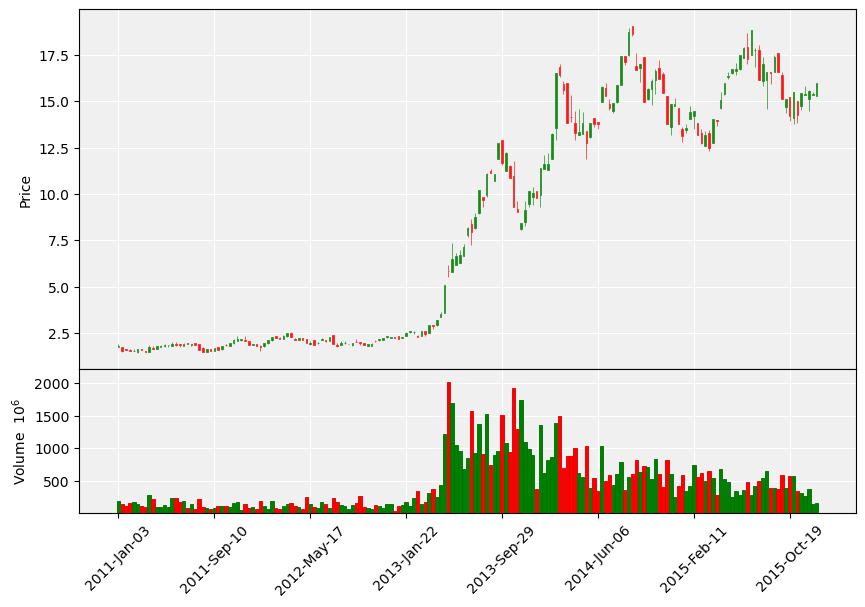

In [13]:
mpf_colors = mpf.make_marketcolors(up='g', down='r', inherit=True)
mpf_style = mpf.make_mpf_style(
    marketcolors=mpf_colors,
    facecolor='#f0f0f0',
    gridstyle='-',
    gridaxis='both',
    gridcolor='white')
mpf.plot(df_ohlc, type='candle', volume=True, style=mpf_style, figratio=(12, 8), figscale=1.25)

Full code for this tutorial:

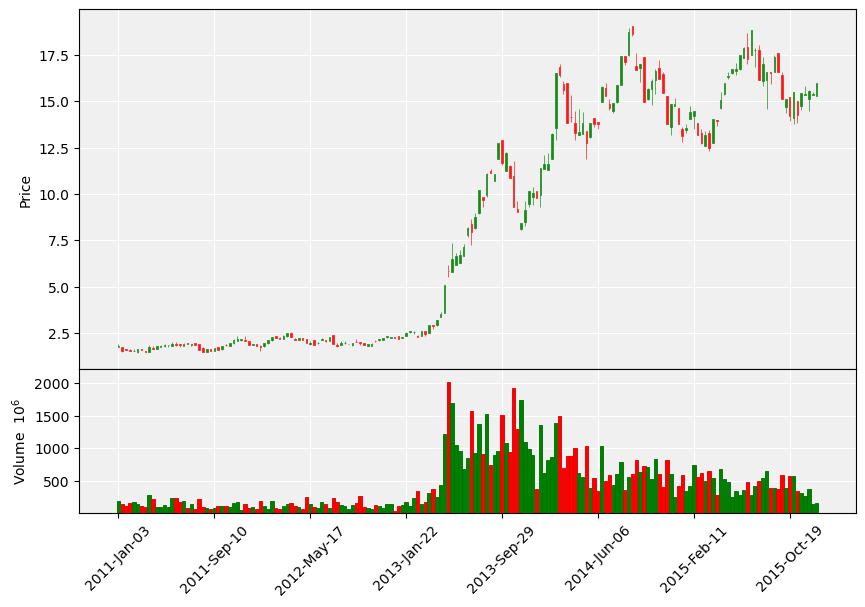

In [14]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
style.use('ggplot')

df = pd.read_csv('tsla.csv', parse_dates=True, index_col=0)

df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_ohlc['volume'] = df['Volume'].resample('10D').sum()

mpf_colors = mpf.make_marketcolors(up='g', down='r', inherit=True)
mpf_style = mpf.make_mpf_style(
    marketcolors=mpf_colors,
    facecolor='#f0f0f0',
    gridstyle='-',
    gridaxis='both',
    gridcolor='white')
mpf.plot(df_ohlc, type='candle', volume=True, style=mpf_style, figratio=(12, 8), figscale=1.25)